In [168]:
import numpy
import torch
import matplotlib.pyplot as plt

In [169]:
# generating synthetic data
def synthetic_data(w, n):
    X = torch.normal(0,1,(n, len(w)))
    y = torch.mm(X,w)
    return X, y

n = 100
d = 200
w_real = torch.randn(d,1)
w_real = torch.nn.functional.dropout(w_real, p=0.8)
w_real.shape
X, y = synthetic_data(w_real, n)

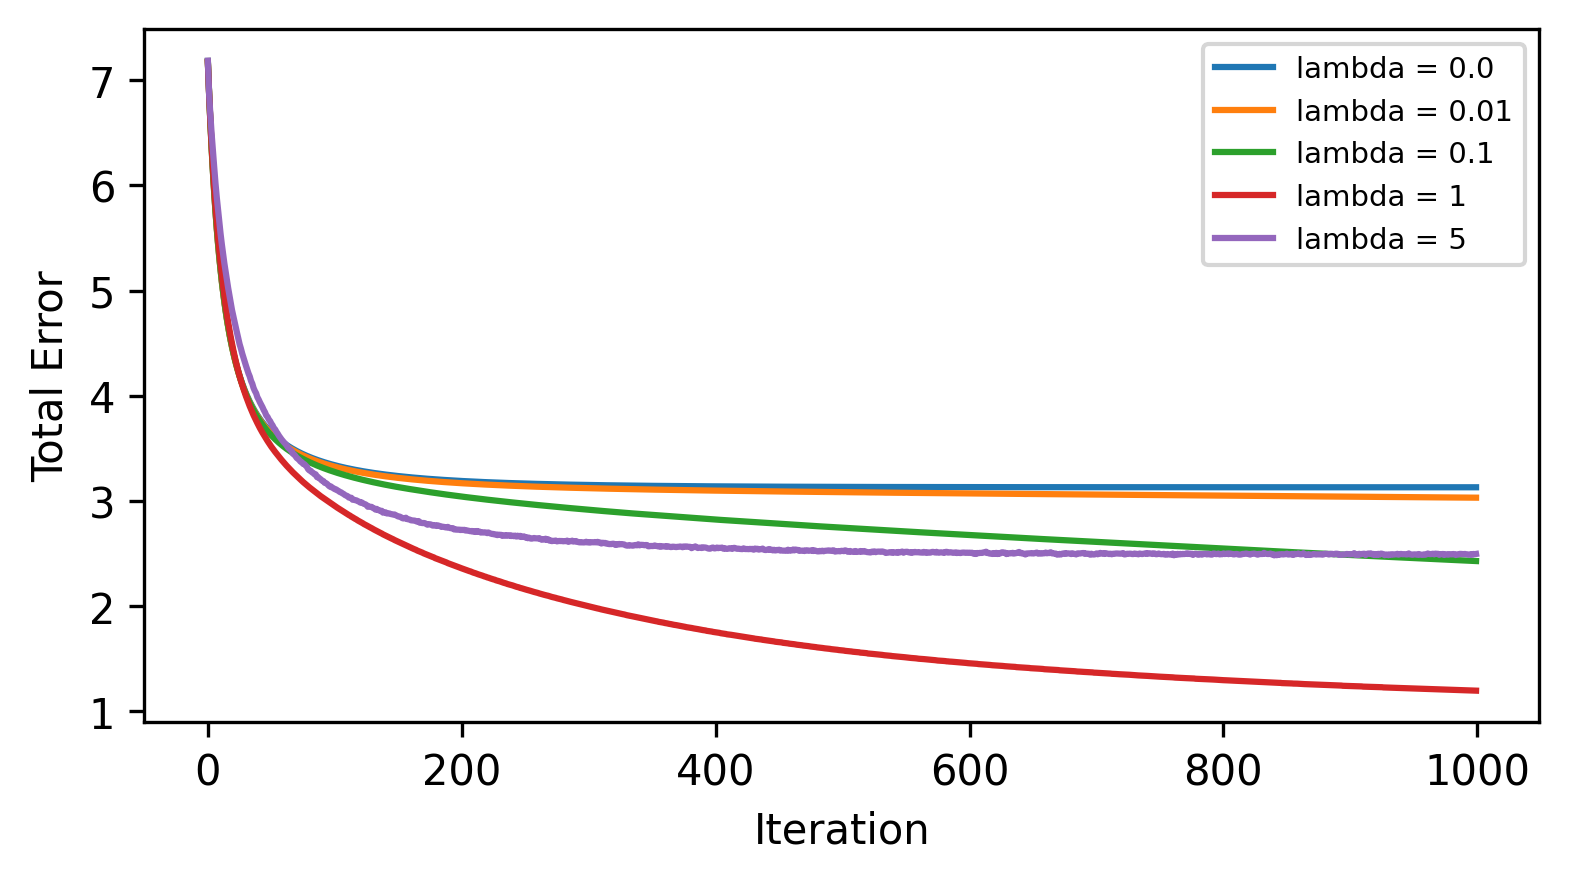

In [170]:
# define the model
class Linear_Regression(torch.nn.Module):
    def __init__(self, output_dim=1):
        super(Linear_Regression, self).__init__()
        self.linear = torch.nn.LazyLinear(output_dim)
        self.linear.weight.data.normal_(0, 0.01)
    def forward(self, x):
        return self.linear(x)
    
# define the model, criterion and optimizer


# Training
plt.figure(figsize=(6,3), dpi=300)
num_epochs = 1000
for lambda_lasso in [0., 0.01, 0.1, 1, 5]:
    model = Linear_Regression()
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
    Err = []
    for epoch in range(num_epochs):
        y_pred = model(X)
        loss = criterion(y_pred,y) + lambda_lasso * torch.norm(model.linear.weight,p=1)
        err = criterion(model.linear.weight.T,w_real)
        Err.append(err.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # if (epoch + 1)%50 == 0:
        #     print(f'Epoch: [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Error: {err.item():.4f}')
    plt.plot(range(num_epochs), Err,label= 'lambda = {}'.format(lambda_lasso))
plt.xlabel("Iteration")
plt.ylabel("Total Error")
plt.legend(fontsize=7)